## Numpy

In [1]:
import numpy as np

In [4]:
# ベクトルを定義(二重カッコ)
x = np.array([[1,2,3]])
x

array([[1, 2, 3]])

In [6]:
y = np.array([[2, 3.9, 6.1]])
y

array([[2. , 3.9, 6.1]])

### データの中心化(平均を算出して実数値から引く)

In [8]:
# 平均の算出: .mean())
x.mean()

2.0

In [10]:
y.mean()

4.0

In [11]:
# データの中心化(Centering)
xc = x - x.mean()
xc

array([[-1.,  0.,  1.]])

In [13]:
yc = y - y.mean()
yc

array([[-2. , -0.1,  2.1]])

In [14]:
xx = xc * xc
xx

array([[1., 0., 1.]])

In [15]:
xy = xc * yc
xy

array([[ 2. , -0. ,  2.1]])

In [16]:
# 合計: .sum()
xx.sum()

2.0

In [17]:
xy.sum()

4.1

In [19]:
# aを算出
a = xy.sum() / xx.sum()
a

2.05

## Pandas

In [20]:
import pandas as pd

In [24]:
# DataFrame
df = pd.read_csv("data/sample.csv")
df

,x,y
0,40.362,137500.0
1,40.686,132500.0
2,38.430,93000.0
3,36.822,96500.0
4,37.002,100500.0
...,...,...
95,47.250,250000.0
96,43.722,166500.0
97,42.642,151500.0
98,43.644,173000.0


In [25]:
type(df)

pandas.core.frame.DataFrame

### PandasでDataframeの操作

In [27]:
# 先頭から ~ 行目
df.head(3)

,x,y
0,40.362,137500.0
1,40.686,132500.0
2,38.430,93000.0


In [28]:
# 後ろから
df.tail(3)

,x,y
97,42.642,151500.0
98,43.644,173000.0
99,41.850,174500.0


In [29]:
# 行区切り
df[:10]

,x,y
0,40.362,137500.0
1,40.686,132500.0
2,38.430,93000.0
3,36.822,96500.0
4,37.002,100500.0
5,35.106,97500.0
6,35.016,97500.0
7,36.762,102000.0
8,38.844,99000.0
9,37.374,97000.0


In [33]:
df[10:12]

,x,y
10,37.17,108500.0
11,40.29,114000.0


In [34]:
#.iloc[行, 列]
df.iloc[1, 1]

132500.0

In [35]:
df.iloc[0,0]

40.362

In [36]:
df.iloc[:5, :]

,x,y
0,40.362,137500.0
1,40.686,132500.0
2,38.430,93000.0
3,36.822,96500.0
4,37.002,100500.0


In [38]:
df.iloc[5, :10]

x       35.106
y    97500.000
Name: 5, dtype: float64

In [39]:
df['x']

0     40.362
1     40.686
2     38.430
3     36.822
4     37.002
       ...  
95    47.250
96    43.722
97    42.642
98    43.644
99    41.850
Name: x, Length: 100, dtype: float64

In [40]:
x = df['x']
y = df['y']

In [41]:
type(x)

pandas.core.series.Series

## Matplotlib

In [42]:
import matplotlib.pyplot as plt

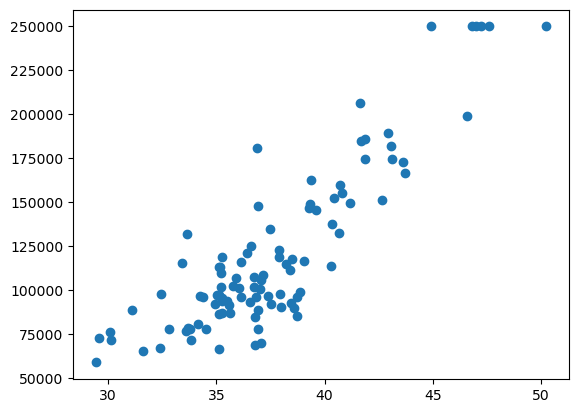

In [44]:
# 散布図: scatter
plt.scatter(x,y)
plt.show()

Text(0, 0.5, 'y')

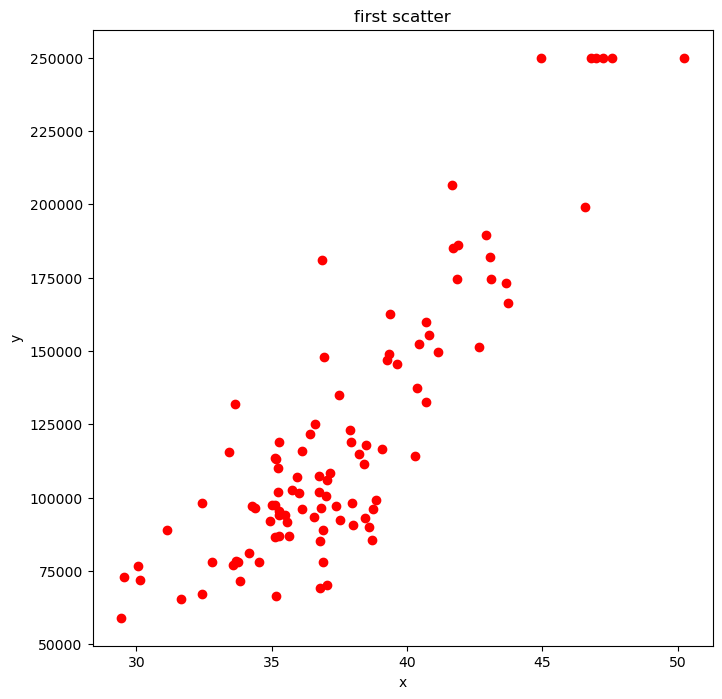

In [53]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(x,y, c='red');

ax.set_title('first scatter')
ax.set_xlabel('x')
ax.set_ylabel('y')

## 単回帰分析

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('data/sample.csv')
df.head(3)

,x,y
0,40.362,137500.0
1,40.686,132500.0
2,38.430,93000.0


### データの中心化

In [58]:
df.describe()

,x,y
count,100.000000,100.000000
mean,37.622220,121065.000000
std,4.087547,47174.009226
min,29.418000,59000.000000
25%,35.151000,90375.000000
50%,36.909000,104250.000000
75%,39.439500,147250.000000
max,50.250000,250000.000000


In [62]:
df.mean()

x        37.62222
y    121065.00000
dtype: float64

In [65]:
df_c = df - df.mean()
df_c

,x,y
0,2.73978,16435.0
1,3.06378,11435.0
2,0.80778,-28065.0
3,-0.80022,-24565.0
4,-0.62022,-20565.0
...,...,...
95,9.62778,128935.0
96,6.09978,45435.0
97,5.01978,30435.0
98,6.02178,51935.0


In [66]:
x = df_c['x']
y = df_c['y']

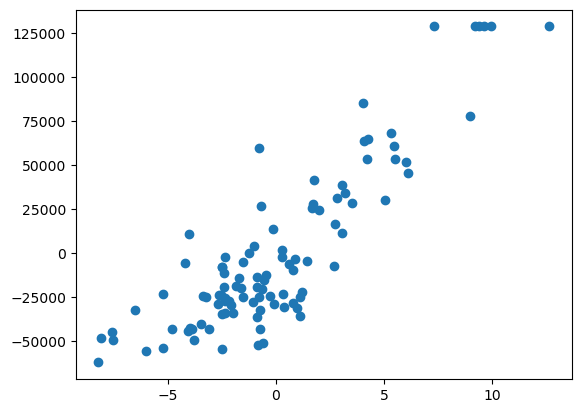

In [69]:
# 散布図(中心化後)
plt.scatter(x, y)

In [70]:
X = df['x']
Y = df['y']

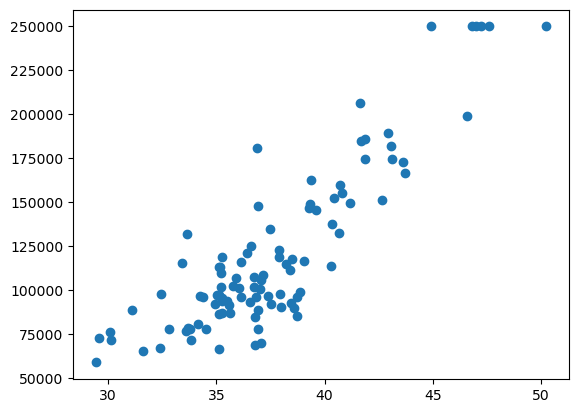

In [71]:
plt.scatter(X, Y)

In [73]:
## パラメータaの計算
xx = x * x
xy = x * y
a = xy.sum() / xx.sum()
a

10069.022519284063

### 結果のプロット

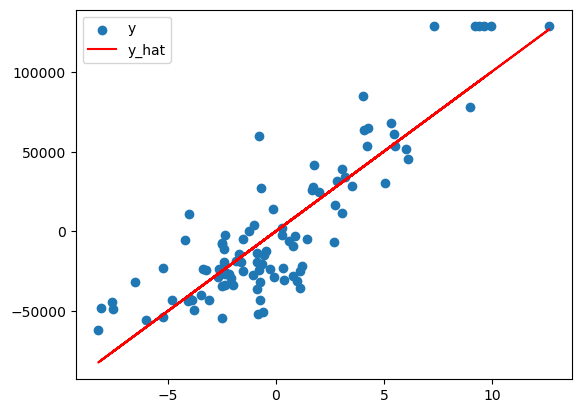

In [76]:
plt.scatter(x, y, label='y'); # 実数値
plt.plot(x, a*x, color='red', label='y_hat') # 予測値
plt.legend() # 凡例の表示

### 予想

In [77]:
# 40平米の家賃はいくらか
x_new = 40

In [80]:
mean = df.mean()
mean['x']

37.62222

In [84]:
# 中心化
xc_new = x_new - mean['x']
xc_new

2.3777800000000013

In [85]:
a * xc_new

23941.920365903272

In [86]:
yc = a * xc_new
yc

23941.920365903272

In [87]:
# 中心化前の状態に戻す
y_hat = yc + mean['y']
y_hat

145006.92036590326

### 予測値を算出する関数を作成

In [88]:
def predict(x):
    # 定数項
    a = 10069.022519284063
    xm = 37.62222
    ym = 121065.00
    
    # 中心化
    xc = x- xm
    
    # 予測
    y_hat = a * xc + ym
    
    return y_hat

In [89]:
predict(40)

145006.92036590326

In [90]:
predict(20)

-56373.53001977797

In [91]:
predict(30)

44316.695173062646